In [0]:
from __future__ import division, print_function, unicode_literals
from numpy import *
import numpy as np
import matplotlib.pyplot as mplot
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd
import seaborn as sns #Need to install
import scipy.stats as stats
import pylab
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle
from sklearn.cluster import KMeans as km
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso as LS
from sklearn.linear_model import Ridge as RG
from sklearn.tree import DecisionTreeRegressor as scart
from sklearn.manifold import TSNE
%matplotlib inline

In [0]:
crop_prod=pd.read_csv('sum_prod.csv',delimiter=',')
crop_prod=crop_prod.fillna(0)
# print(crop_prod.dtypes)

In [12]:
crop_prod.sort_values(by=crop_prod.columns[0])
STATENAM = sorted(set(crop_prod.iloc[:,0].values))
crop_prod.head()

,STATENAM,YEAR,QWHEAT,QRICE,QMAIZE,QJOWAR,QBAJRA,QSUGAR,QPOTATO,QGNUT,QBARLEY,QTOBAC,QGRAM,QTUR,QRAGI,QSESAMUM,QRMSEED,QCOTTON,QOPULS,QSOY,QSUNFLWR,QJUTE
0,BIHAR,1956,184.533000,3795.153000,378.284,0.000,0.000,372.916000,291.570,0.000,128.316000,7.415,145.682000,48.938,74.265,6.748,12.182000,0.00000,0.000,0.0,0.0,225.40752
1,HARYANA,1956,641.940000,82.846000,103.637,38.711,179.028,253.698000,35.561,5.962,112.883000,0.775,1108.206000,27.958,0.000,0.784,56.899000,30.44538,37.391,0.0,0.0,0.00000
2,WEST_BENGAL,1956,27.198261,4801.670153,40.515,0.000,0.000,117.712172,313.612,0.000,29.499745,9.319,120.312223,0.000,0.000,0.000,25.046186,0.00000,0.000,0.0,0.0,243.97758
3,MADHYA_PRADESH,1956,1730.200000,3316.400000,188.900,1099.600,91.100,169.800000,337.668,201.100,138.631000,4.320,1007.100000,417.363,0.000,67.400,0.000000,101.22000,436.530,0.0,0.0,0.00000
4,KARNATAKA,1956,65.400000,1068.700000,8.400,851.000,112.600,344.550000,0.000,657.050,0.000000,18.010,40.970000,181.318,0.000,0.000,0.000000,71.14000,79.560,0.0,0.0,0.00000


In [13]:
crop_price=pd.read_csv("price_avg.csv",delimiter=',')
for i in range(1,crop_price.shape[1]):
    crop_price.iloc[:,i]=pd.to_numeric(crop_price.iloc[:,i],errors='coerce')
    crop_price.iloc[:,i]=crop_price.iloc[:,i].fillna(0)
crop_price.head()

,STATENAM,YEAR,PJOWAR,PMAIZE,PWHEAT,PSUGAR,PPOTATO,PGNUT,PRICE,PBAJRA,PTUR,PRAGI,PTOBAC,PBARLEY,PGRAM,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,BIHAR,1956,0.000000,29.885588,49.465294,41.099412,28.259765,36.620000,48.061176,0.000000,34.860412,28.417353,196.132588,34.117471,40.171471,70.066706,73.758824,0.000000,34.860412,0.0,0.0,40.333529
1,HARYANA,1956,27.611667,30.828667,39.260000,29.198577,28.707825,40.249539,31.051667,34.910000,31.949833,34.910000,134.408667,30.355833,31.949833,80.240000,72.116333,70.634165,31.949833,0.0,0.0,0.000000
2,WEST_BENGAL,1956,0.000000,27.967157,40.333238,41.578080,24.780750,0.000000,51.761852,0.000000,0.000000,0.000000,164.131440,30.733488,30.810286,0.000000,71.472148,0.000000,0.000000,0.0,0.0,66.223333
3,MADHYA_PRADESH,1956,35.146512,24.500000,43.913953,36.691395,28.560710,34.370930,42.751163,40.348837,33.322326,40.348837,301.959302,33.222590,33.322326,67.640465,60.122173,57.483488,37.528128,0.0,0.0,0.000000
4,KARNATAKA,1956,31.831579,27.757895,51.610526,32.278947,38.688244,40.758421,67.215789,29.078947,43.191579,29.078947,217.828421,48.226340,43.191579,49.941055,62.801414,82.564737,37.220526,0.0,0.0,0.000000


In [14]:
area_cult=pd.read_csv("sum_area.csv",delimiter=',')
# print(sum(area_cult.isna()))
area_cult.head()

,STATENAM,YEAR,AWHEAT,ARICE,AMAIZE,AJOWAR,ABAJRA,ASUGAR,APOTATO,AGNUT,ABARLEY,ATOBAC,AGRAM,ATUR,ARAGI,ASESAMUM,ARMSEED,ACOTTON,AOPULS,ASOY,ASUNFLWR,AJUTE
0,BIHAR,1956,761.655000,4982.91100,612.143,0.00,0.000,162.511000,49.842000,0.000,373.100000,16.702,496.049000,128.039,143.704,25.902,57.170000,0.000,0.000,0.0,0.0,249.785
1,HARYANA,1956,540.789000,98.26900,81.466,238.47,791.602,90.217000,2.294000,9.018,108.604000,1.262,1346.922000,27.914,0.000,3.172,161.470000,117.813,147.602,0.0,0.0,0.000
2,WEST_BENGAL,1956,84.763967,4445.18468,56.100,0.00,0.000,24.170931,47.924049,0.000,69.959514,15.300,194.129557,0.000,0.000,0.000,72.692308,0.000,0.000,0.0,0.0,271.827
3,MADHYA_PRADESH,1956,3240.300000,3889.40000,430.100,1644.70,172.000,52.910000,28.759000,346.080,146.964000,6.520,1543.300000,486.501,0.000,321.030,0.000000,767.410,1026.790,0.0,0.0,0.000
4,KARNATAKA,1956,309.800000,942.60000,10.000,2597.40,534.500,54.420000,0.000000,938.500,0.000000,44.620,159.150000,401.276,0.000,0.000,0.000000,1183.150,291.170,0.0,0.0,0.000


In [15]:
crop_price.head()

,STATENAM,YEAR,PJOWAR,PMAIZE,PWHEAT,PSUGAR,PPOTATO,PGNUT,PRICE,PBAJRA,PTUR,PRAGI,PTOBAC,PBARLEY,PGRAM,PSESAMUM,PRMSEED,PCOTTON,POPULS,PSOY,PSUNFLWR,PJUTE
0,BIHAR,1956,0.000000,29.885588,49.465294,41.099412,28.259765,36.620000,48.061176,0.000000,34.860412,28.417353,196.132588,34.117471,40.171471,70.066706,73.758824,0.000000,34.860412,0.0,0.0,40.333529
1,HARYANA,1956,27.611667,30.828667,39.260000,29.198577,28.707825,40.249539,31.051667,34.910000,31.949833,34.910000,134.408667,30.355833,31.949833,80.240000,72.116333,70.634165,31.949833,0.0,0.0,0.000000
2,WEST_BENGAL,1956,0.000000,27.967157,40.333238,41.578080,24.780750,0.000000,51.761852,0.000000,0.000000,0.000000,164.131440,30.733488,30.810286,0.000000,71.472148,0.000000,0.000000,0.0,0.0,66.223333
3,MADHYA_PRADESH,1956,35.146512,24.500000,43.913953,36.691395,28.560710,34.370930,42.751163,40.348837,33.322326,40.348837,301.959302,33.222590,33.322326,67.640465,60.122173,57.483488,37.528128,0.0,0.0,0.000000
4,KARNATAKA,1956,31.831579,27.757895,51.610526,32.278947,38.688244,40.758421,67.215789,29.078947,43.191579,29.078947,217.828421,48.226340,43.191579,49.941055,62.801414,82.564737,37.220526,0.0,0.0,0.000000


In [0]:
crop_price_year=pd.read_csv('price_year.csv',delimiter=',')
crop_price_year=crop_price_year.fillna(0)

In [90]:
crop_price_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,TOBAC,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,43.187258,41.190087,28.484940,26.356545,27.769277,37.426100,28.402587,39.285801,29.471242,167.869482,35.462950,32.734899,29.450375,67.710816,64.721887,63.907390,31.900534,0.0,0.0,17.741169
1,1957,42.979839,43.562016,30.040616,24.083642,26.280011,39.113553,28.623609,41.796386,26.906162,175.337646,34.193125,31.540664,28.856264,70.519070,64.756141,70.327843,35.020101,0.0,0.0,17.149851
2,1958,48.813222,43.926039,32.844178,26.744115,29.063172,47.341284,28.608965,43.134198,32.809844,202.535551,43.004186,39.672414,31.825891,71.077195,65.799562,74.871588,41.072037,0.0,0.0,16.706689
3,1959,46.862000,44.066294,30.495578,27.666089,28.522844,49.530732,29.562451,46.290822,27.782508,222.768610,38.707483,36.135408,30.530407,69.959613,66.181269,74.052776,39.225863,0.0,0.0,15.250956
4,1960,45.090633,43.425872,31.000470,27.557708,29.708605,43.186069,28.711125,50.377390,27.367883,220.243069,39.547193,36.645273,31.438156,83.893891,76.462328,89.697121,39.581415,0.0,0.0,31.098163


In [0]:
area_cult_year=pd.read_csv('area_year.csv',delimiter=',')
area_cult_year=area_cult_year.fillna(0)

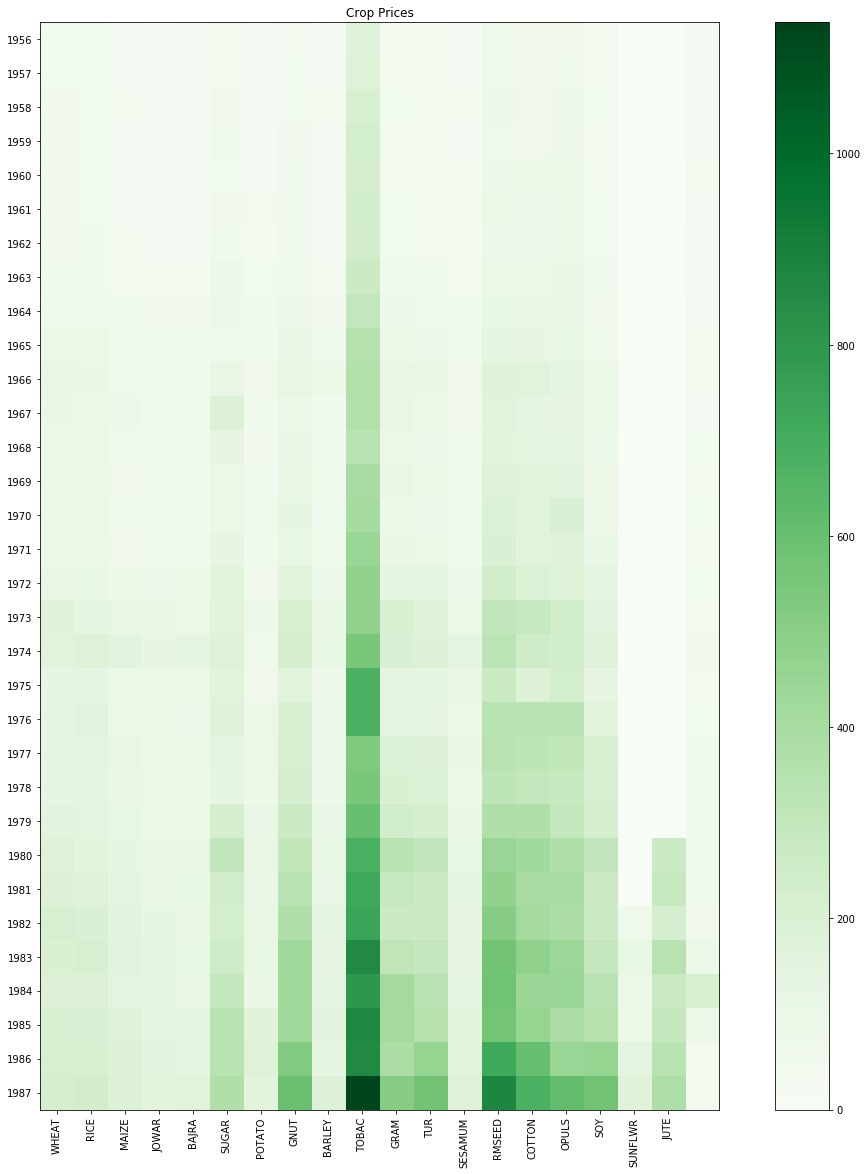

In [19]:
mat1 = np.matrix(crop_price_year.values[:,1:],dtype='float')
# print(mat2.shape)
#mat2=np.delete(mat2,12,1)
# print(mat2.shape)
fig = plt.figure(num=1,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(crop_price_year.columns[1:],12))))
ax.set_yticks(np.arange(len(crop_price_year.iloc[:,0])))
ax.set_xticklabels(np.delete(crop_price_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult_year.iloc[:,0])
plt.imshow(mat1, cmap='Greens')
plt.colorbar()
plt.title('Crop Prices')
plt.show()

In [20]:
area_cult_year.head()

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,TOBAC,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,12951.36897,28783.21868,3352.050,16496.839,11386.333,2021.141931,231.402049,5674.862,3520.938514,356.259,9655.280557,3064.431,210.719,1643.351,880.358308,7944.251,5086.020,0.0,0.0,580.983
1,1957,11124.86045,28693.36952,3679.540,17247.415,11107.748,2021.018879,258.429187,6414.056,3169.552666,321.009,9100.404669,3100.436,234.834,1587.144,994.199430,7932.753,5169.518,0.0,0.0,547.372
2,1958,11964.39013,29432.29205,3782.756,17895.009,11357.569,1907.863530,271.796749,6240.430,3343.798489,336.840,10071.397620,3143.685,263.433,1731.856,966.217271,7866.980,5185.647,0.0,0.0,561.731
3,1959,12724.82640,30077.45306,3881.671,17645.206,10645.070,2078.814530,290.731068,6449.811,3393.273385,364.333,10336.769820,3140.471,269.401,1657.272,845.306753,7220.447,5203.516,0.0,0.0,497.293
4,1960,12259.01078,30315.49543,3925.277,18411.868,11482.312,2353.335932,291.139436,6449.220,3220.483023,353.806,9229.449101,3122.379,277.621,1455.727,840.690470,7536.802,5155.862,0.0,0.0,489.865


In [21]:
type(area_cult_year)

pandas.core.frame.DataFrame

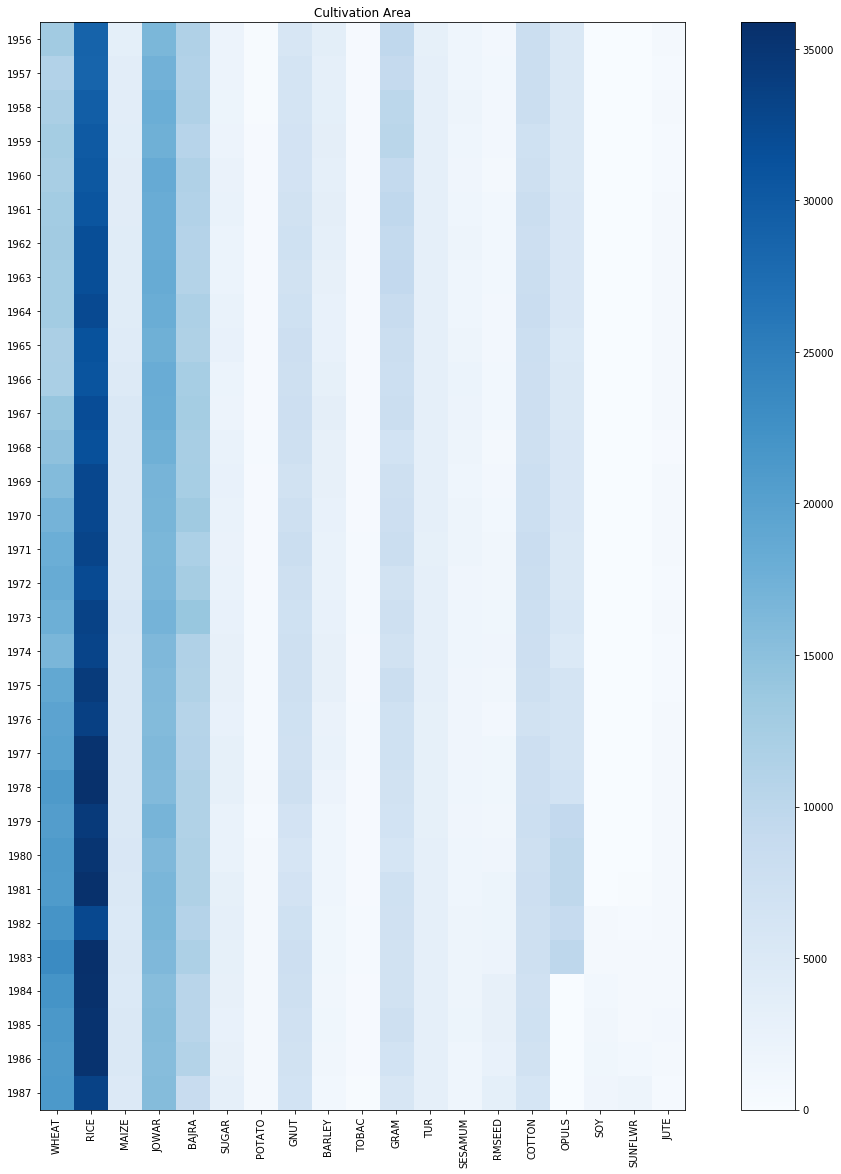

In [22]:
mat2 = np.matrix(area_cult_year.values[:,1:],dtype='float')
# print(mat2.shape)
mat2=np.delete(mat2,12,1)
# print(mat2.shape)
fig = plt.figure(num=2,figsize=(20,20))
ax = fig.add_subplot(1,1,1)
# ax.set_aspect('equal')
ax.set_xticks(np.arange(len(np.delete(area_cult_year.columns[1:],12))))
ax.set_yticks(np.arange(len(area_cult_year.iloc[:,0])))
ax.set_xticklabels(np.delete(area_cult_year.columns[1:],12),rotation='vertical')
ax.set_yticklabels(area_cult_year.iloc[:,0])
plt.imshow(mat2, cmap='Blues')
plt.colorbar()
plt.title('Cultivation Area')
plt.show()

In [101]:
df = pd.read_csv("price_year.csv")
df.shape

(32, 21)

In [102]:
df

,YEAR,WHEAT,RICE,MAIZE,JOWAR,BAJRA,SUGAR,POTATO,GNUT,BARLEY,TOBAC,GRAM,TUR,RAGI,SESAMUM,RMSEED,COTTON,OPULS,SOY,SUNFLWR,JUTE
0,1956,43.187258,41.190087,28.484940,26.356545,27.769277,37.426100,28.402587,39.285801,29.471242,167.869482,35.462950,32.734899,29.450375,67.710816,64.721887,63.907390,31.900534,0.000000,0.000000,17.741169
1,1957,42.979839,43.562016,30.040616,24.083642,26.280011,39.113553,28.623609,41.796386,26.906162,175.337646,34.193125,31.540664,28.856264,70.519070,64.756141,70.327843,35.020101,0.000000,0.000000,17.149851
2,1958,48.813222,43.926039,32.844178,26.744115,29.063172,47.341284,28.608965,43.134198,32.809844,202.535551,43.004186,39.672414,31.825891,71.077195,65.799562,74.871588,41.072037,0.000000,0.000000,16.706689
3,1959,46.862000,44.066294,30.495578,27.666089,28.522844,49.530732,29.562451,46.290822,27.782508,222.768610,38.707483,36.135408,30.530407,69.959613,66.181269,74.052776,39.225863,0.000000,0.000000,15.250956
4,1960,45.090633,43.425872,31.000470,27.557708,29.708605,43.186069,28.711125,50.377390,27.367883,220.243069,39.547193,36.645273,31.438156,83.893891,76.462328,89.697121,39.581415,0.000000,0.000000,31.098163
5,1961,46.742005,44.147218,30.426459,28.333015,30.458514,44.522620,36.296646,51.053519,27.899399,232.812448,41.755878,38.323966,32.272787,84.922306,75.189354,88.879109,40.071431,0.000000,0.000000,24.325752
6,1962,47.420532,49.547925,31.551339,29.113625,30.818795,57.276979,31.613654,51.977906,27.415459,227.069309,42.445378,39.624541,32.685734,81.340544,73.455895,93.841802,42.431811,0.000000,0.000000,16.932418
7,1963,57.210559,56.937961,35.089808,34.083852,34.829837,81.278799,41.185992,54.446189,38.792326,261.619721,55.494006,51.035698,36.639714,86.739013,89.044732,97.752770,53.203632,0.000000,0.000000,20.671217
8,1964,70.005913,68.734669,50.369200,44.804735,46.795813,73.795939,50.897765,71.565033,45.832251,299.634802,73.888226,68.513441,50.501989,114.528362,108.215287,106.300660,65.361692,0.000000,0.000000,26.473794
9,1965,87.460120,87.185401,60.508726,49.987318,52.807154,68.266920,52.213215,98.097144,55.793608,349.873018,87.843626,81.315599,57.887497,141.036721,128.523826,112.388379,69.387679,0.000000,0.000000,31.508808


### We created a dataframe called `wheat_df` which has the columns `YEAR` and `WHEAT` which signify the year and the wheat grown in that year respectively.

In [109]:
wheat_df = df[["YEAR", "WHEAT"]]
wheat_df.head()

,YEAR,WHEAT
0,1956,43.187258
1,1957,42.979839
2,1958,48.813222
3,1959,46.862000
4,1960,45.090633


#### We tried to use various methods to predict the growth of wheat. The first method we tried was using Linear Regression. We used the first 20 data points ranging from year `1956` to `1977` as our training data and we used the remaining data to check whether the predictions are correct or not.

#### We splitted the `wheat_df` dataframe into `X_train`, `X_test`, `y_train` and `y_test`.

In [0]:
X = np.array(wheat_df["YEAR"])
y = np.array(wheat_df["WHEAT"])
X_train = X[:-10]
X_test = X[-10:]
y_train = y[:-10]
y_test = y[-10:]

In [217]:
X_train

array([1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977])

In [105]:
X_test

array([1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987])

We reshaped the data to arrange all the data points into a single row. We used reshape(-1, 1) to do so.

In [0]:
X = X.reshape(-1, 1)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

We created a new Linear Regression using the `LR()` function found in `sklearn.linear_model` and stored it to `reg`. We then used the training datasets `X_train` and `y_train` to train our Linear Regression model. We then tried to predict the wheat grown in the year `1987` using the Linear Regression model and compared it with the real wheat growth value found in our `y_test` test data.

In [223]:
reg = LR()
reg.fit(X_train, y_train)
reg_1987 = reg.predict(np.array([1987]).reshape(1,-1))[0]
real_1987 = y_test[1987 - X_test[0]][0]
print(reg_1987)
print(real_1987)

198.81202099239817
215.17455619999998


The result was pretty satisfactory considering the training data. We can see the percentage difference in the cell below.


In [224]:
abs(real_1987 - reg_1987)/100

0.16362535207601808

However, we realized that using a Linear Regression Model is not the best way to go. This is because Linear Regression does not take patterns into account and will give unidirectional results only. For example, if the model calculates that the training data's values are always going up on average, it will predict in a similar way, never dipping now.

Because of this, we tried using the decision trees as they might give more accurate results.

We use the `DecisionTreeRegressor` from `sklearn.tree`. We use the `fit()` function to train the Decision Tree model using the `X_train` and `y_train` data. Like before, we try to predict the wheat grown for the year `1987` but use the `dtree` instead of `reg`. We then print the predicted value as well as the real value.

In [230]:
dtree = scart()
dtree.fit(X_train, y_train)
dtree_1987 = dtree.predict(np.array([1987]).reshape(1,-1))[0]
print(dtree_1987)
print(real_1987)

135.39034750000002
215.17455619999998


We can see that the outputs are not as expected. We figured out that the samples, the training and the test data were major factors in giving accurate predictions using Decision trees. To get a fair analysis. We did this test numerous times with different samples and training:test ratios.

In [231]:
abs(real_1987 - dtree_1987)/100

0.7978420869999997

In [108]:
wheat_df

,YEAR,WHEAT
0,1956,43.187258
1,1957,42.979839
2,1958,48.813222
3,1959,46.862000
4,1960,45.090633
5,1961,46.742005
6,1962,47.420532
7,1963,57.210559
8,1964,70.005913
9,1965,87.460120


The scores are shown below, the `dtree` score is significantly lesser than the `reg` score.

In [232]:
reg.score(X_test,y_test)

0.4532576976736124

In [233]:
dtree.score(X_test, y_test)

-3.9126333861424527

Our first prototype for improving the outputs is given below. Here we use the `train_test_split()` function found in `sklearn.model_selection` to get random samples to test and train our models.

In [0]:
#import sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = 0.25, random_state = 100)

The output received below is much better. We then ran the procedure several times to be sure.

In [245]:
reg = LR()
reg.fit(X_train,y_train)
print(reg.predict(np.array([1987]).reshape(1,-1))[0])
#print(y_test[1987 - X_test[0]][0])

205.17241368856412


In [246]:
dtree = scart()
dtree.fit(X_train, y_train)
print(dtree.predict(np.array([1987]).reshape(1,-1))[0])
#print(y_test[1987 - X_test[0]][0])

215.17455619999998


In [247]:
wheat_df[wheat_df["YEAR"] == 1987]

,YEAR,WHEAT
31,1987,215.174556


In [238]:
reg.score(X_test,y_test)

0.87551060858414

In [239]:
dtree.score(X_test, y_test)

0.8385247870034318

Given below is our code using 9 different variants of our samples `X` and `y`. We change the `test_size` (ratio between training and test data) in each iteration. We've used the `random_state` attribute for `train_test_split()` too. We append the scores to lists `reg_scores` and `dtree_scores` and plot them using `matplotlib.plt`.

In [0]:
from sklearn.model_selection import train_test_split

reg_scores = []
dtree_scores = []
for i in range(1, 10):
  X_train, X_test, y_train, y_test = train_test_split( 
          X, y, test_size = i  * 0.09, random_state = 1000)
  reg = LR()
  reg.fit(X_train,y_train)
  dtree = scart()
  dtree.fit(X_train, y_train)
  reg_scores.append(reg.score(X_test, y_test))
  dtree_scores.append(dtree.score(X_test, y_test))

We can see that the scores from Linear Regression and Decision Tree are close to each other. We conclude that Decision Trees would've worked much better if we have more training data.

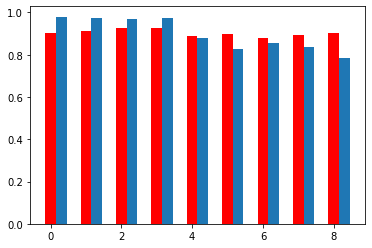

In [249]:
import matplotlib.pyplot as plt
plt.bar(np.arange(len(reg_scores)), reg_scores, width=0.3, color='red')
plt.bar(np.arange(len(dtree_scores))+ width, dtree_scores, width=0.3)
plt.show()